## Perform analysis and basic recommendations based on similar genres and movies which user prefers.

In [1]:
import plotly.express as px

In [2]:
import ipywidgets as widgets

In [3]:
from ipywidgets import interact,interact_manual

In [4]:
from IPython.display import display

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
plt.rcParams['figure.figsize']=(16,5)
plt.style.use('fivethirtyeight')

In [8]:
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

## Read the dataset

In [9]:
data=pd.read_csv('movie_metadata.csv')

In [10]:
data.shape

(5043, 28)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [12]:
data.drop(['color', 
                      'director_facebook_likes', 
                      'actor_3_facebook_likes', 
                      'actor_1_facebook_likes', 
                      'cast_total_facebook_likes', 
                      'actor_2_facebook_likes',  
                      'facenumber_in_poster', 
                      'content_rating', 
                      'country', 
                      'movie_imdb_link', 
                      'aspect_ratio',
                      'plot_keywords',],axis=1,inplace=True)

In [13]:
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

## Handling missing values

In [14]:
data.isnull().sum()

director_name             104
num_critic_for_reviews     50
duration                   15
actor_2_name               13
gross                     884
genres                      0
actor_1_name                7
movie_title                 0
num_voted_users             0
actor_3_name               23
num_user_for_reviews       21
language                   12
budget                    492
title_year                108
imdb_score                  0
movie_facebook_likes        0
dtype: int64

In [15]:
# Check the percentage of missing values
round(100*(data.isnull().sum()/len(data.index)),2)

director_name              2.06
num_critic_for_reviews     0.99
duration                   0.30
actor_2_name               0.26
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
actor_3_name               0.46
num_user_for_reviews       0.42
language                   0.24
budget                     9.76
title_year                 2.14
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [16]:
# Remove all the rows with NaN values in gross and budget columns.
data=data[~np.isnan(data['gross'])]
data=data[~np.isnan(data['budget'])]

In [17]:
data.shape

(3891, 16)

In [18]:
data.isnull().sum()

director_name              0
num_critic_for_reviews     1
duration                   1
actor_2_name               5
gross                      0
genres                     0
actor_1_name               3
movie_title                0
num_voted_users            0
actor_3_name              10
num_user_for_reviews       0
language                   3
budget                     0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
dtype: int64

In [19]:
#impute the missing values

# using mean for numeric columns
data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].mean(),inplace=True)
data['duration'].fillna(data['duration'].mean(),inplace=True)

In [20]:
#impute the missing values

#using mode for categorical columns
data['language'].fillna(data['language'].mode()[0],inplace=True)

In [21]:
#impute the missing values

#Replace missing actor names with "Unknown Actor" as statistical imputation is not possible

data['actor_1_name'].fillna('Unknown Actor',inplace=True)
data['actor_2_name'].fillna('Unknown Actor',inplace=True)
data['actor_3_name'].fillna('Unknown Actor',inplace=True)

In [22]:
data.isnull().sum()

director_name             0
num_critic_for_reviews    0
duration                  0
actor_2_name              0
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              0
num_user_for_reviews      0
language                  0
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

## Feature Engineering

In [23]:
# convert gross and budget from $ to million $ to make analysis easier

data['gross']=data['gross']/1000000
data['budget']=data['budget']/1000000

In [24]:
# We will find top 10 profitable movies. We need to add profit column for the same. And then need to perform sorting on it.
data['profit']=data['gross']-data['budget']

In [25]:
data['profit'].head()

0    523.505847
1      9.404152
2    -44.925825
3    198.130642
5   -190.641321
Name: profit, dtype: float64

In [26]:
# Let's find top 10 profitable movies
data.sort_values(by='profit',ascending=False)[['movie_title','profit']].head(10)
#sorted_data[['movie_title','profit']]

,movie_title,profit
0,Avatar,523.505847
29,Jurassic World,502.177271
26,Titanic,458.672302
3024,Star Wars: Episode IV - A New Hope,449.935665
3080,E.T. the Extra-Terrestrial,424.449459
794,The Avengers,403.279547
17,The Avengers,403.279547
509,The Lion King,377.783777
240,Star Wars: Episode I - The Phantom Menace,359.544677
66,The Dark Knight,348.316061


In [27]:
#Remove duplicates from above output
print("Number of rows before removing duplicates:",data.shape[0])
data.drop_duplicates(subset=None,keep='first',inplace=True)
print("Number of rows aftre removing duplicates",data.shape[0])

Number of rows before removing duplicates: 3891
Number of rows aftre removing duplicates 3856


In [28]:
data.sort_values(by='profit',ascending=False)[['movie_title','profit']].head(10)

,movie_title,profit
0,Avatar,523.505847
29,Jurassic World,502.177271
26,Titanic,458.672302
3024,Star Wars: Episode IV - A New Hope,449.935665
3080,E.T. the Extra-Terrestrial,424.449459
17,The Avengers,403.279547
509,The Lion King,377.783777
240,Star Wars: Episode I - The Phantom Menace,359.544677
66,The Dark Knight,348.316061
439,The Hunger Games,329.999255


In [29]:
# Check values present in language columns
data['language'].value_counts()

English       3676
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Korean           5
Portuguese       5
Norwegian        4
Danish           3
Dutch            3
Persian          3
Thai             3
Hebrew           3
Indonesian       2
Aboriginal       2
Dari             2
Vietnamese       1
Swedish          1
Zulu             1
Arabic           1
Czech            1
Icelandic        1
Filipino         1
Kazakh           1
Russian          1
Dzongkha         1
Bosnian          1
Aramaic          1
Maya             1
Hungarian        1
Telugu           1
None             1
Romanian         1
Mongolian        1
Name: language, dtype: int64

In [29]:
# Let's keep only two languages english and foreign
def language(x):
    if x=='English':
        return 'English'
    else:
        return 'Foreign'
    
data['language']=data['language'].apply(language)
data['language'].value_counts()

English    3676
Foreign     180
Name: language, dtype: int64

In [30]:
# Categorize the movie in two parts: Short and long
def duration(x):
    if x<=120:
        return 'Short'
    else:
        return 'Long'
    
data['duration']=data['duration'].apply(duration)
data['duration'].value_counts()


Short    2939
Long      917
Name: duration, dtype: int64

In [31]:
#Check values present in Genres columns

data['genres'].value_counts()

Drama                                    153
Comedy|Drama|Romance                     151
Comedy|Drama                             147
Comedy                                   145
Comedy|Romance                           135
                                        ... 
Animation|Comedy|Family|Horror|Sci-Fi      1
Comedy|Family|Fantasy|Horror|Mystery       1
Action|Adventure|Crime|Drama|Romance       1
Biography|Documentary|History              1
Drama|Family|Music|Musical                 1
Name: genres, Length: 762, dtype: int64

In [32]:
data['genres'].str.split('|')[0]

['Action', 'Adventure', 'Fantasy', 'Sci-Fi']

In [34]:
# we can see from the above output that most of the movies are having a lot of genres
# also, a movie can have so many genres so lets keep four genres
data['Moviegenres']=data['genres'].str.split('|')
data['genre1']=data['Moviegenres'].apply(lambda x:x[0])
data['genre2']=data['Moviegenres'].apply(lambda x:x[1] if len(x)>1 else x[0])
data['genre3']=data['Moviegenres'].apply(lambda x:x[2] if len(x)>2 else x[0])
data['genre4']=data['Moviegenres'].apply(lambda x:x[3] if len(x)>3 else x[0])


In [35]:
data[['genres','genre1','genre2','genre3','genre4']].head(5)

,genres,genre1,genre2,genre3,genre4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action


## Data Visualization

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3856 entries, 0 to 5042
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   director_name           3856 non-null   object 
 1   num_critic_for_reviews  3856 non-null   float64
 2   duration                3856 non-null   object 
 3   actor_2_name            3856 non-null   object 
 4   gross                   3856 non-null   float64
 5   genres                  3856 non-null   object 
 6   actor_1_name            3856 non-null   object 
 7   movie_title             3856 non-null   object 
 8   num_voted_users         3856 non-null   int64  
 9   actor_3_name            3856 non-null   object 
 10  num_user_for_reviews    3856 non-null   float64
 11  language                3856 non-null   object 
 12  budget                  3856 non-null   float64
 13  title_year              3856 non-null   float64
 14  imdb_score              3856 non-null   

In [37]:
# Calculating social media popularity of movies and sorting movies based on popularity
# to calculate popularity of a movie, we can aggregate No. of voted users, No. of Users for Reviews, and Facebook Likes.

data['Social_popularity']=(data['num_user_for_reviews']/data['num_voted_users'])*data['movie_facebook_likes']

# Check top 10 movies according to social media popularity
popular=data[['movie_title','Social_popularity']].sort_values(by='Social_popularity',ascending=False).head(10).reset_index()
print(popular)

   index                          movie_title  Social_popularity
0     10  Batman v Superman: Dawn of Justice         1599.794424
1    150                        Ghostbusters         1076.336425
2   1582                        Ghostbusters         1075.827482
3     96                        Interstellar         1024.560802
4   3015               10 Days in a Madhouse          828.025478
5    945                      Into the Woods          692.937200
6     73                       Suicide Squad          652.816996
7   1190                Fifty Shades of Grey          624.306881
8    108                            Warcraft          622.790277
9     92        Independence Day: Resurgence          599.274128


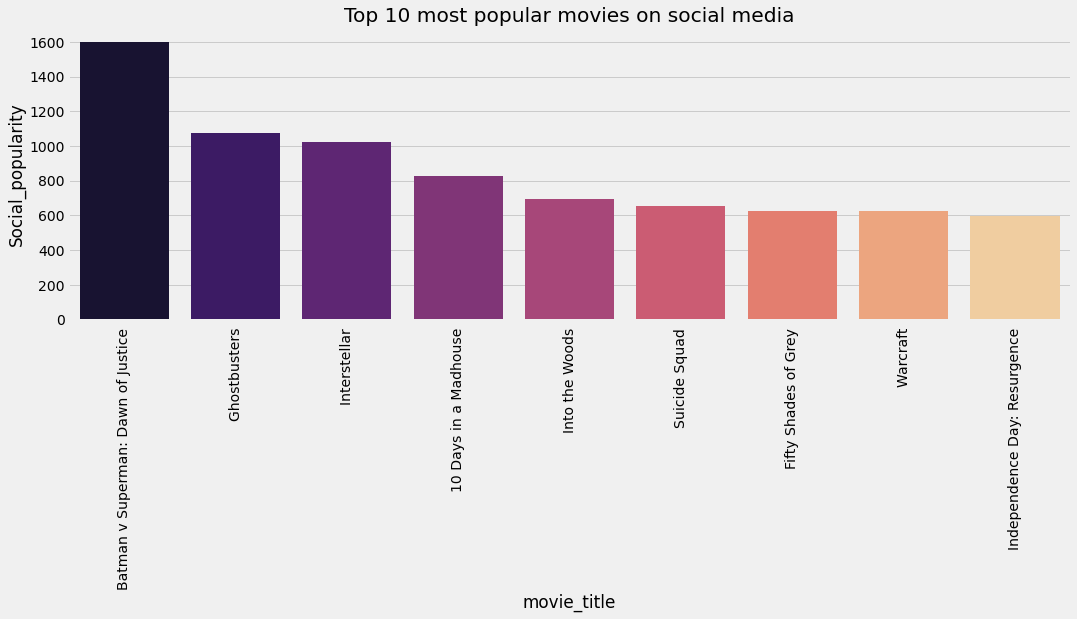

In [38]:
sns.barplot(popular['movie_title'],popular['Social_popularity'],palette = 'magma')
plt.title('Top 10 most popular movies on social media')
plt.xticks(rotation=90,fontsize=14)
plt.show()

In [88]:
# The most profitable movies from each genre

print('The most profitable movies from each genres')
temp=data.loc[data.groupby(data['genre1'])['profit'].idxmax()][['genre1','movie_title','gross']]
temp


The most profitable movies from each genres


,genre1,movie_title,gross
0,Action,Avatar,760.505847
509,Adventure,The Lion King,422.783777
521,Animation,Despicable Me 2,368.049635
1403,Biography,The Blind Side,255.950375
836,Comedy,Forrest Gump,329.691196
3466,Crime,The Godfather,134.821952
3583,Documentary,Fahrenheit 9/11,119.078393
26,Drama,Titanic,658.672302
3080,Family,E.T. the Extra-Terrestrial,434.949459
2485,Fantasy,The Others,96.471845


In [40]:
# Most profitable year in box office

print("The most profitable years in box office")
data['title_year']=data['title_year'].astype(int)
display(data[['title_year','language','profit']].groupby(['language','title_year']).agg('sum').
        sort_values(by='profit',ascending=False))
                                                                                                                        

The most profitable years in box office


profit
language title_year              
English  2014         2729.797944
         2012         2701.504634
         2015         2364.554417
         2002         2268.274235
         2009         2133.449256
...                           ...
Foreign  1988        -1099.560838
         2004        -2392.431612
         1997        -2461.416981
         2005        -7031.978451
         2006       -13066.704574

[104 rows x 1 columns]

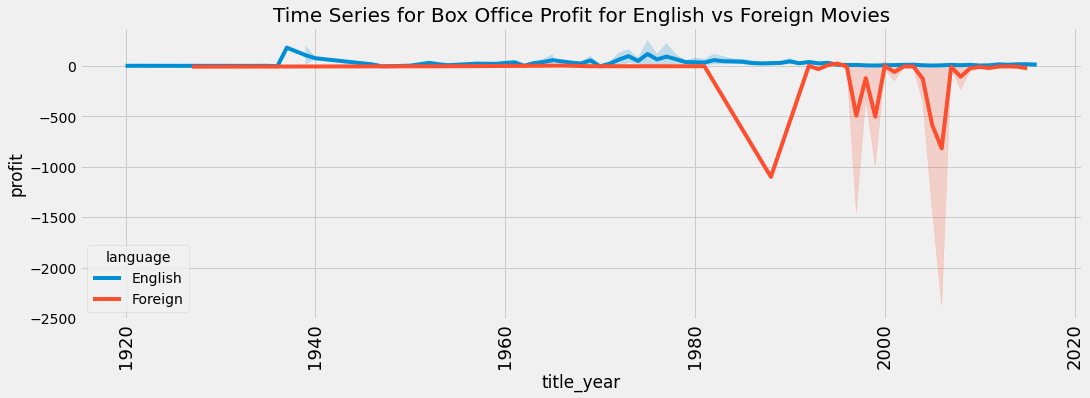

In [41]:
sns.lineplot(data['title_year'],data['profit'],hue=data['language'])
plt.title('Time Series for Box Office Profit for English vs Foreign Movies', fontsize = 20)
plt.xticks(rotation=90,fontsize=18)
plt.show()   


In [42]:
print('Movies those made huge losses')
display(data[data['profit']<-2000][['movie_title','language','profit']])

Movies those made huge losses


,movie_title,language,profit
2323,Princess Mononoke,Foreign,-2397.701809
2334,Steamboy,Foreign,-2127.109510
2988,The Host,Foreign,-12213.298588
3005,Fateless,Foreign,-2499.804112
3859,Lady Vengeance,Foreign,-4199.788333


In [43]:
#Compare IMDB score for long and short duration movies

print("The average IMDB score for long movies is:{0:.2f}".format(data[data['duration']=='Long']['imdb_score'].mean()))
print("The average IMDB score for short movies is:{0:.2f}".format(data[data['duration']=='Short']['imdb_score'].mean()))
print("\n Highest rated Long duration movie\n",
data[data['duration']=='Long'].sort_values(by='imdb_score',ascending=False)[['movie_title','imdb_score']].head(1))
print("\n Highest rated Short duration movie\n",
data[data['duration']=='Short'].sort_values(by='imdb_score',ascending=False)[['movie_title','imdb_score']].head(1))


The average IMDB score for long movies is:7.06
The average IMDB score for short movies is:6.28

 Highest rated Long duration movie
                     movie_title  imdb_score
1937  The Shawshank Redemption          9.3

 Highest rated Short duration movie
               movie_title  imdb_score
3592  The Usual Suspects          8.6


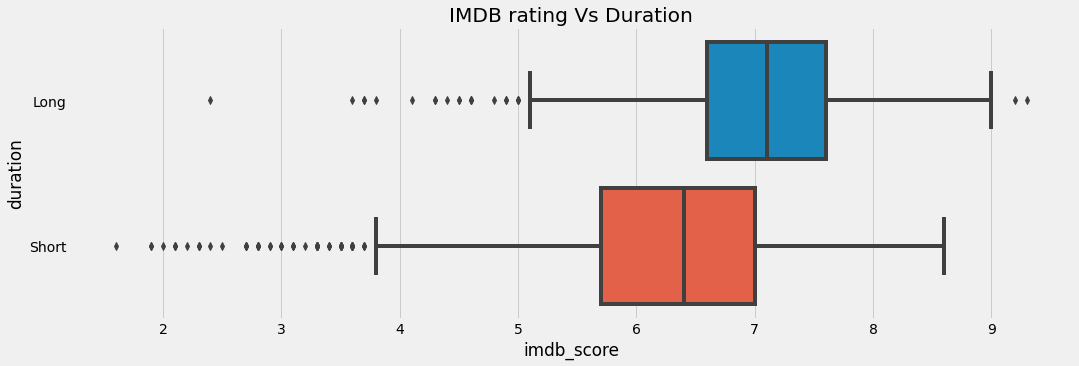

In [44]:
sns.boxplot(data['imdb_score'],data['duration'])
plt.title('IMDB rating Vs Duration')
plt.show()

## Recommending movies based on the language

In [45]:
def recommend_lang(x):
    temp_recm=data[['language','movie_title','imdb_score']][data['language']==x].sort_values(by='imdb_score',ascending=False)
    return temp_recm.head(15)

In [46]:
recommend_lang('English')

,language,movie_title,imdb_score
1937,English,The Shawshank Redemption,9.3
3466,English,The Godfather,9.2
66,English,The Dark Knight,9.0
2837,English,The Godfather: Part II,9.0
339,English,The Lord of the Rings: The Return of the King,8.9
1874,English,Schindler's List,8.9
3355,English,Pulp Fiction,8.9
97,English,Inception,8.8
2051,English,Star Wars: Episode V - The Empire Strikes Back,8.8
836,English,Forrest Gump,8.8


In [47]:
recommend_lang('Foreign')

,language,movie_title,imdb_score
4498,Foreign,"The Good, the Bad and the Ugly",8.9
4029,Foreign,City of God,8.7
4747,Foreign,Seven Samurai,8.7
2373,Foreign,Spirited Away,8.6
4921,Foreign,Children of Heaven,8.5
4259,Foreign,The Lives of Others,8.5
3931,Foreign,Samsara,8.5
4659,Foreign,A Separation,8.4
1329,Foreign,Baahubali: The Beginning,8.4
2970,Foreign,Das Boot,8.4


## Recommending movies based on Actors

In [48]:
def recommend_movies_on_actors(x):
    a = data[['movie_title','imdb_score']][data['actor_1_name'] == x]
    b = data[['movie_title','imdb_score']][data['actor_2_name'] == x]
    c = data[['movie_title','imdb_score']][data['actor_3_name'] == x]
    a = a.append(b)
    a = a.append(c)
    a = a.sort_values(by = 'imdb_score', ascending = False)
    return a.head(15)

In [49]:
recommend_movies_on_actors('Tom Cruise')

,movie_title,imdb_score
1868,Rain Man,8.0
75,Edge of Tomorrow,7.9
284,Minority Report,7.7
158,The Last Samurai,7.7
736,Collateral,7.6
1524,A Few Good Men,7.6
940,Interview with the Vampire: The Vampire Chroni...,7.6
155,Mission: Impossible - Ghost Protocol,7.4
135,Mission: Impossible - Rogue Nation,7.4
671,Eyes Wide Shut,7.3


## Recommending similar genres

In [81]:
data['movie_title'].isnull().sum()

0

In [50]:
from mlxtend.preprocessing import TransactionEncoder

In [77]:
x=data['genres'].str.split('|')
te=TransactionEncoder()
x=te.fit_transform(x)
x=pd.DataFrame(x,columns=te.columns_)

In [78]:
x.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [82]:
genres=x.astype('int')
genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [83]:
genres.insert(0, 'movie_title', data['movie_title'])

genres.head()

,movie_title,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Avatar,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Spectre,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,The Dark Knight Rises,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,NaN,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [124]:
genres = genres.set_index('movie_title')

genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Spectre,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
The Dark Knight Rises,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
NaN,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [136]:
# Recommending movies based on similar genres
def recommend_genre(gen):
    gen=genres[gen]
    similar_gen=genres.corrwith(gen)
    similar_gen=similar_gen.sort_values(ascending=False)
    similar_gen=similar_gen.iloc[1:]
    return similar_gen.head(3)

In [137]:
recommend_genre('Action')

Adventure    0.320686
Thriller     0.303907
Sci-Fi       0.295135
dtype: float64

## Recommending similar movies

In [151]:
x = genres.transpose()
x.head()

movie_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,NaN,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,...,25th Hour,NaN,Bound,Requiem for a Dream,NaN,Tango,NaN,Moms' Night Out,Donnie Darko,NaN
Action,1,1,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
Adventure,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Comedy,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [156]:
x.columns = x.columns.fillna('to_drop')
x.drop('to_drop', axis = 1, inplace = True)

In [157]:
x.head()

movie_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,...,The Names of Love,Savage Grace,Police Academy,Four Weddings and a Funeral,25th Hour,Bound,Requiem for a Dream,Tango,Moms' Night Out,Donnie Darko
Action,1,1,1,1,1,0,1,0,1,1,...,0,0,0,1,0,0,0,0,1,0
Adventure,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Comedy,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [158]:
# We can find co-relation in x matrix to recommend similar movies
def recommendation_movie(movie):    
    movie = x[movie+'\xa0']
    similar_movies = x.corrwith(movie)
    similar_movies = similar_movies.sort_values(ascending=False)
    similar_movies = similar_movies.iloc[1:]
    return similar_movies.head(10)

In [159]:
recommendation_movie('Avatar')

movie_title
Romeo Must Die                      1.0
The Big Lebowski                    1.0
Oz the Great and Powerful           1.0
The Chronicles of Riddick           1.0
Prometheus                          1.0
Charlie's Angels: Full Throttle     1.0
Kung Pow: Enter the Fist            1.0
Must Love Dogs                      1.0
Daylight                            1.0
The Lone Ranger                     1.0
dtype: float64